回归问题
===
回归问题包括线性回归问题和非线性回归问题两种，线性回归是一种用来对于连续性变量进行预测的办法


# 1.问题的引出
![images](images/01_02_001.png)<br/>
$x_1$ : 房子大小, $x_2$ : 卧室数量, $x_3$ : 楼层数量, $x_4$ : 房龄, y : 房子的价格，则有：
$$x_1=\begin{bmatrix}
2104\\\\
1416\\\\
1534\\\\
852\\\\
...
\end{bmatrix},x_2=\begin{bmatrix}
5\\\\
3\\\\
3\\\\
2\\\\
...
\end{bmatrix},x_3=\begin{bmatrix}
1\\\\
2\\\\
2\\\\
1\\\\
...
\end{bmatrix},x_4=\begin{bmatrix}
45\\\\
40\\\\
30\\\\
36\\\\
...
\end{bmatrix},y=\begin{bmatrix}
460\\\\
232\\\\
315\\\\
178\\\\
...
\end{bmatrix}$$
我们选择使用一个简单的线性函数来逼近$y$
$$h_{\Theta}(X)=\Theta_0+\Theta_1x_1+\Theta_2x_2+...+\Theta_nx_n$$
在式子里的$\theta_i$叫做参数（或权重），用于参数化$X\to Y$的线性函数映射空间。这时，使用线性代数表示更为方便。我们假
设：$$x_0=1,x=\begin{bmatrix}
x_1\\\\
x_2\\\\
x_3\\\\
...\\\\
x_n
\end{bmatrix},
\theta=\begin{bmatrix}
\theta_1\\\\
\theta_2\\\\
\theta_3\\\\
...\\\\
\theta_n
\end{bmatrix}$$
那么就有$h_{\Theta}(X)=\sum_{i=1}^n(h_{\theta}(x^{(i)})-y^{(i)})=\Theta^TX$。对于样本大概符合线性关系的情况，我们总是可以写出公式$$Y=\Theta^TX+\varepsilon$$
Y是实际的结果，$\Theta^TX$是计算出来的结果，$\varepsilon$是误差。根据中心极限定理，我们知道每个样本距离线性回归曲线的误差，是独立并且具有相同的分布，通常认为服从高斯分布$N-(0, \sigma^2)$

# 2.线性回归的似然函数
由于$\varepsilon$符合高斯分布$N-(0, \sigma^2)$，那么就有$P(\varepsilon)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{\varepsilon^2}{2\sigma^2}}$，并且$\varepsilon=Y-\Theta^TX$，则有
$$
P(y^{(i)}|x^{(i)};\theta)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}
$$
那么它的似然函数就是它的联合概率密度，则有
$$L(\theta)=\prod_{i=1}^mP(y^{(i)}|x^{(i)};\theta)=\prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}$$
接下来求其对数似然
$$\begin{eqnarray}
\ell(\theta)&=&logL(\theta)\\
&=&log\prod_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}\\
&=&\sum_{i=1}^mlog\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(y^{(i)}-\theta^Tx^{(i)})^2}{2\sigma^2}}\\
&\Rightarrow& \ell(\theta)=mlog\frac{1}{\sqrt{2\pi}\sigma}-\frac{1}{\sigma^2} \bullet \frac{1}{2}\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2
\end{eqnarray}$$
对于我们来说需要求最大似然，由于$mlog\frac{1}{\sqrt{2\pi}\sigma}$和$\frac{1}{\sigma^2}$都是定值，所以我们只要求$\frac{1}{2}\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2$的最小值就行了，也就有了
$$
J(\theta)=\frac{1}{2}\sum_{i=1}^m(y^{(i)}-\theta^Tx^{(i)})^2
$$

# 3.损失函数
$$
J(\theta)=\frac{1}{2}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})^2
$$
发现里面是期望值与真实值的差值的平方，这不就是最小二乘吗。所以误差符合高斯分布，那就是最小二乘

# 4.$\theta$的解法
## 4.1.最小二乘法
首先解释以下损失函数中的各个符号的意义
- $y^{(i)}$表示样本第i行的期望值
- $x^{(i)}$表示样本第i行的特征值，是一个行向量$x_{i1},x_{i2},...,x_{in}$
- $h_{\theta}(x^{(i)})$是第i行计算出来的实际值

所以损失函数也可以写成
$$J(\theta)=\frac{1}{2}(X\Theta-Y)^T(X\Theta-Y)$$
其中X是$m*n$的样本，$\Theta$是一个$m*1$的列向量，Y也是一个$m*1$的列向量
$$
\begin{eqnarray}
J(\Theta)&=&\frac{1}{2}(\Theta^TX^T-Y^T)(X\Theta-Y)\\
&=&\frac{1}{2}(\Theta^TX^TX\Theta-\Theta^TX^TY-Y^TX\Theta+Y^TY)
\end{eqnarray}$$
因为我们希望找到$J(\Theta)$的最小值，那么需要求出$\frac{\partial{J(\Theta)}}{\partial{\Theta}}$，因为$X^TX$一定是对称矩阵，根据线性代数的法则
$$\frac{\partial{\Theta^TA\Theta}}{\partial{\Theta}}=2A\Theta$$
则有
$$
\begin{eqnarray}
\frac{\partial{J(\Theta)}}{\partial{\Theta}}&=&\frac{1}{2}(2X^TX\Theta-X^TY-(Y^TX)^T+0)\\
&=&\frac{1}{2}(2X^TX\Theta-2X^TY)\\
&\Rightarrow& \frac{\partial{J(\Theta)}}{\partial{\Theta}}=X^TX\Theta-X^TY
\end{eqnarray}$$
现在我们令其等于0，那么就有$X^TX\Theta = X^TY$，如果$X^TX$是可逆的，那么$\Theta=(X^TX)^{-1} \bullet X^TY$。如果$X^TX$不可逆或者为了防止过拟合，可以增加$\lambda$扰动，有
$$\Theta=(X^TX+\lambda{I})^{-1} \bullet X^TY$$
由于$X^TX$一定是一个半正定矩阵，那么加上一个$\lambda{I}$，则一定是一个正定矩阵，正定矩阵一定是可逆的。损失函数$J(\Theta)$一定是一个凸函数，开口向上的，所以它有极小值，这是因为它的二次项$\Theta^TX^XT\Theta$，它的一阶导数是$2X^TX\Theta$，二阶导数就是$2X^TX$，这个一定是半正定的,半正定的函数一定是凸函数

### 4.1.1.最小二乘法的具体做法
根据上面可知，我们需要计算的是$\Theta=(X^TX)^{-1} \bullet X^TY$
- 首先将数据集x，y转变为矩阵xMat,yMat，通过np.mat方法
- 然后计算$X^TX$，方法就是xMat.T * xMat
- 接下来判断$X^TX$不能为0，方法是np.linalg.det(xTx)，因为如果为0，那么就不可逆了。
- 那么$\Theta$就是xTx.I * (xMat.T * yMat)

## 4.2.局部加权线性回归(LWLR - Locally Weighted Linear Regression)
线性回归的一个问题是有可能出现欠拟合，因为它求的是具有最小均方误差的无偏估计。如果欠拟合可能导致对未知数据预测能力下降，故统计学家提出了允许在估计中引入一些偏差，从而降低预测的均方误差，这一方法叫做局部加权线性回归。可以看到k=1.0的局部加权，和普通的线性回归基本是差不多的，K越小，拟合程度越高，K=0.003的时候已经有了过拟合的倾向.这种算法会给待测点附近的已知样本点赋予一定的权重，距离待测点近的样本权重大，反之则权重小。该算法求解回归系数的公式如下
$$\hat{W}=(X^T\omega X)^{-1}X^T\omega Y$$
其中$W$是一个矩阵，用来给每个训练样本赋予权重，除了这一点之外该公式与之前的求解系数公式毫无差异，这里的权重矩阵W是依据测试点和训练样本事先求出来的，公式如下
$$\omega=e^{\frac{|x^i-x|}{-2\sigma^2}}$$
$\sigma$就是例子中的参数k

## 4.3.梯度下降法
线性回归问题也可以用梯度下降法来求解,图在最下方

真实值： 2 3 -1
预测值： [ 2.02055876  2.94019988 -0.62183884]


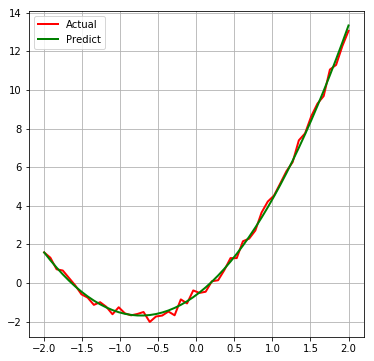

In [2]:
'''
求函数的最优值
'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq
%matplotlib inline

def residual(t, x, y):
    return y - (t[0] * x ** 2 + t[1] * x + t[2])

plt.figure(figsize=(6,6), facecolor='w')
x = np.linspace(-2, 2, 50)
A, B, C = 2, 3, -1
y = (A * x ** 2 + B * x + C) + np.random.rand(len(x))*0.75

t = leastsq(residual, [0, 0, 0], args=(x, y))
theta = t[0]
print('真实值：', A, B, C)
print('预测值：', theta)
y_hat = theta[0] * x ** 2 + theta[1] * x + theta[2]
plt.plot(x, y, 'r-', linewidth=2, label=u'Actual')
plt.plot(x, y_hat, 'g-', linewidth=2, label=u'Predict')
plt.legend(loc='upper left')
plt.grid()

# 5.线性回归的复杂度惩罚因子
对于线性回归来说，n个样本必然能找到一个最高阶为n-1次方的函数，使得求的的曲线经过所有点，但是这样存在两个问题
- 过拟合
- 所求的$\Theta$系数过大

基于此，需要将目标函数增加平方和损失
$$J(\Theta)=\frac{1}{2}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\Theta_j^2$$
新加的东西叫做正则项，由于是取的平方，所以也叫做L2正则；在线性回归中，这个叫做岭(Ridge)回归;
$$J(\Theta)=\frac{1}{2}\sum_{i=1}^m(h_{\Theta}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n|\Theta_j|$$
这就是L1正则，叫做Lasso回归

## 5.1.误差平方和-MSE
$$\varphi=\frac{1}{m}\sum_{i=1}^m(y_i-\hat{y_i})^2$$
如果MSE趋近于0，那么说明在训练集上拟合程度很好

## 5.2.一些概念
对于m个样本$(\overrightarrow{x_1},y_1), (\overrightarrow{x_2},y_2),...,(\overrightarrow{x_m},y_m)$，某模型的估计值为$(\overrightarrow{x_1},\hat{y_1}), (\overrightarrow{x_2},\hat{y_2}),...,(\overrightarrow{x_m},\hat{y_m})$
- 样本的总平方和TSS(Total Sum of Squares):$TSS=\sum_{i=1}^m(y_i-\overline{y})^2$
- 残差平方和RSS(Residual Sum of Squares):$RSS=\sum_{i=1}^m(\hat{y_i}-y_i)^2$
- $R^2=1-\frac{RSS}{TSS}$,$R^2$越大，拟合效果越好。最优值为1；若模型预测为随机值，$R^2$可能为负；若预测值恒为样本期望，$R^2=0$
- ESS(Expalined Sum of Squares):$ESS=\sum_{i=1}^m(\hat{y_i}-\overline{y})^2$

只有在无偏估计时才有$TSS=ESS+RSS$；否则$TSS \ge ESS+RSS$.ESS又称为回归平方和SSR(Sum of Squares for Regression)

<Figure size 1296x864 with 0 Axes>

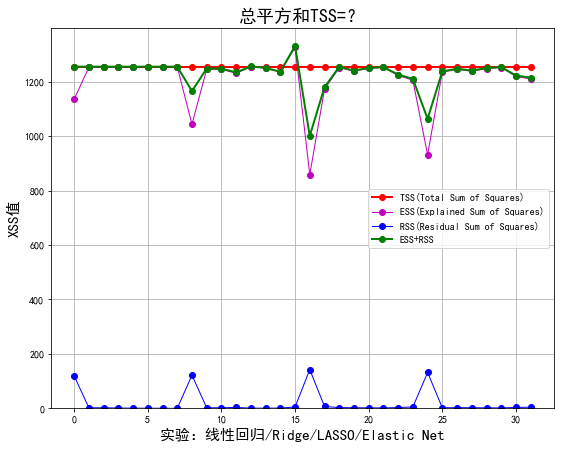

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import matplotlib as mpl
import warnings
%matplotlib inline

def xss(y, y_hat):
    y = y.ravel()
    y_hat = y_hat.ravel()
    # Version 1
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_hat - y) ** 2).sum()
    ess = ((y_hat - np.average(y)) ** 2).sum()
    r2 = 1 - rss / tss
    # print 'RSS:', rss, '\t ESS:', ess
    # print 'TSS:', tss, 'RSS + ESS = ', rss + ess
    tss_list.append(tss)
    rss_list.append(rss)
    ess_list.append(ess)
    ess_rss_list.append(rss + ess)
    # Version 2
    # tss = np.var(y)
    # rss = np.average((y_hat - y) ** 2)
    # r2 = 1 - rss / tss
    corr_coef = np.corrcoef(y, y_hat)[0, 1]
    return r2, corr_coef

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

models = [Pipeline([('poly', PolynomialFeatures()),('linear', LinearRegression(fit_intercept=False))])
    ,
          Pipeline([('poly', PolynomialFeatures()),('linear', RidgeCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))])
    ,
          Pipeline([('poly', PolynomialFeatures()),('linear', LassoCV(alphas=np.logspace(-3, 2, 50), fit_intercept=False))])
    ,
          Pipeline([('poly', PolynomialFeatures()),('linear', ElasticNetCV(alphas=np.logspace(-3, 2, 50), l1_ratio=[.1, .5, .7, .9, .95, .99, 1],fit_intercept=False))])
          ]
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)

plt.figure(figsize=(18, 12), facecolor='w')
d_pool = np.arange(1, N, 1)  # 阶
m = d_pool.size
clrs = []  # 颜色
for c in np.linspace(16711680, 255, N):
    clrs.append("#{:06X}".format(int(c), 2))
line_width = np.linspace(5, 2, m)
titles = u'线性回归', u'Ridge回归', u'LASSO', u'ElasticNet'
tss_list = []
rss_list = []
ess_list = []
ess_rss_list = []
for t in range(models.__len__()):
    model = models[t]
    for i, d in enumerate(d_pool):
        model.set_params(poly__degree=d)
        model.fit(x, y.ravel())
        lin = model.get_params('linear')['linear']
        output = u'%s：%d阶，系数为：' % (titles[t], d)
        if hasattr(lin, 'alpha_'):
            idx = output.find(u'系数')
            output = output[:idx] + (u'alpha=%.6f，' % lin.alpha_) + output[idx:]
        if hasattr(lin, 'l1_ratio_'):   # 根据交叉验证结果，从输入l1_ratio(list)中选择的最优l1_ratio_(float)
            idx = output.find(u'系数')
            output = output[:idx] + (u'l1_ratio=%.6f，' % lin.l1_ratio_) + output[idx:]
        x_hat = np.linspace(x.min(), x.max(), num=100)
        x_hat.shape = -1, 1
        y_hat = model.predict(x_hat)
        s = model.score(x, y)
        r2, corr_coef = xss(y, model.predict(x))

        z = N - 1 if (d == 2) else 0
        label = u'%d阶，$R^2$=%.3f' % (d, s)
        if hasattr(lin, 'l1_ratio_'):
            label += u'，L1 ratio=%.2f' % lin.l1_ratio_

y_max = max(max(tss_list), max(ess_rss_list)) * 1.05
plt.figure(figsize=(9, 7), facecolor='w')
t = np.arange(len(tss_list))
plt.plot(t, tss_list, 'ro-', lw=2, label=u'TSS(Total Sum of Squares)')
plt.plot(t, ess_list, 'mo-', lw=1, label=u'ESS(Explained Sum of Squares)')
plt.plot(t, rss_list, 'bo-', lw=1, label=u'RSS(Residual Sum of Squares)')
plt.plot(t, ess_rss_list, 'go-', lw=2, label=u'ESS+RSS')
plt.ylim((0, y_max))
plt.legend(loc='center right')
plt.xlabel(u'实验：线性回归/Ridge/LASSO/Elastic Net', fontsize=15)
plt.ylabel(u'XSS值', fontsize=15)
plt.title(u'总平方和TSS=？', fontsize=18)
plt.grid(True)

# 6.多元线性回归与多项式回归
多元线性回归是指一个因变量与多个自变量之间的线性回归，由于是线性回归，那么自变量都是1次方；而多项式回归分为一元多项式回归以及多元多项式回归，由于是多项式，那么自变量会出现高次幂。很多多项式回归以及非线性回归都可以转化为多元线性回归问题。以下代码可以产生多项式，并且多项式包含的是相互影响的特征集。比如：一个输入样本是２维的。形式如[a,b] ,则二阶多项式的特征集如下$[1,a,b,a^2,ab,b^2]$

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = [1,2]
pf = PolynomialFeatures(degree=2)
x = np.reshape(x, (-1, 1))
x_trans = pf.fit_transform(x)
print(x_trans)

[[1. 1. 1.]
 [1. 2. 4.]]


# 7.总结
## 7.1.线性回归(Linear Regression)
- 损失函数：
$$J(\theta)=\frac{1}{2}(X\theta-Y)^T(X\theta-Y)$$
- 优化方法: 最小二乘法和梯度下降法最小二乘法可以解出回归系数$\theta$为
$$\theta=(X^TX)^{-1}X^TY$$
- 使用场景:一般来说，只要我们觉得数据有线性关系，LinearRegression是我们的首先应该采用的。如果发现拟合或者预测的不好，再考虑用其他的线性回归库
- 单纯的使用线性回归，会导致模型欠拟合，这是我们需要用局部加权(Locally Weighted Linear Regression, LWLR)的办法来进行拟合.在这个算法中，我们给预测点附近的每个点赋予一定的权重，然后与 线性回归 类似，在这个子集上基于最小均方误差来进行普通的回归.

## 7.2.岭回归(Ridge Regression)
- 损失函数：
$$J(\overrightarrow{\theta})=\frac{1}{2}\sum_{i=1}^m(h_{\overrightarrow{\theta}}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n\theta_j^2, \lambda > 0$$
- 优化方法：一般也是使用最小二乘法或梯度下降法来优化参数
$$\theta=(X^TX+\alpha{E})^{-1}X^TY$$
- 使用场景：一般来说，只要我们觉得数据有线性关系，用LinearRegression拟合的不是特别好，需要正则化，可以考虑用Ridge Regression。但是这个类最大的缺点是每次我们要自己指定一个超参数$\alpha$，然后自己评估$\alpha$的好坏，比较麻烦。一般情况下，需要配合GridSearchCV或者RandomSearchCV来一起使用，帮忙优化超参数$\alpha$。如果输入特征的维度很高，而且是稀疏线性关系的话，RidgeCV类就不合适了，这时应该主要考虑Lasso回归类家族.在SKLearn库中，有一个RidgeCV类，它的损失函数和优化方法跟Ridge是一样的，区别在于验证方法。RidgeCV对超参数$\alpha$使用了交叉验证，来帮忙我们选择一个合适的$\alpha$。在初始化RidgeCV时候，我们可以传一组备选的$\alpha$值，10个，100个都可以。RidgeCV类会帮我们选择一个合适的$\alpha$。免去了我们自己去一轮轮筛选$\alpha$的苦恼。RidgeCV使用的是广义交叉验证，这是一种有效的留一验证法

## 7.3.Lasso回归
- 损失函数:
$$J(\overrightarrow{\theta})=\frac{1}{2}\sum_{i=1}^m(h_{\overrightarrow{\theta}}(x^{(i)})-y^{(i)})^2+\lambda\sum_{j=1}^n|\theta_j|, \lambda > 0$$
- 优化方法：一般也是使用最小二乘法或梯度下降法来优化参数
- 使用场景：输入特征的维度很高，而且是稀疏线性关系

Lasso是估计稀疏系数的线性模型。它在一些情况下是有用的，因为它倾向于使用具有较少参数值的情况，有效地减少给定解决方案所依赖变量的数量。因此，Lasso及其变体是压缩感知领域的基础。在一定条件下，它可以恢复一组非零权重的精确集。SKLearn中的Lasso类的实现使用了coordinate descent（坐标下降算法）来拟合系数

## 7.4.弹性网
- 损失函数：
$$J(\overrightarrow{\theta})=\frac{1}{2}\sum_{i=1}^m(h_{\overrightarrow{\theta}}(x^{(i)})-y^{(i)})^2+\lambda(\rho \bullet \sum_{j=1}^n|\theta_j|+(1-\rho) \bullet \sum_{j=1}^n\theta_j^2), \begin{cases}
\lambda > 0\\\\
\rho \in [0,1]
\end{cases}$$
- 优化方法：同上
- 使用场景：ElasticNet用在我们发现用Lasso回归太过（太多特征被稀疏为0），而用Ridge回归又正则化的不够（回归系数衰减的太慢）的时候。一般不推荐拿到数据就直接就ElasticNet
- 优势：L1正则可以进行特征选择和降维，L2正则的效果较好，所以弹性网综合了两个的优势